<a href="https://colab.research.google.com/github/sunilbabu07/customer-conversion-prediction/blob/main/guvi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing required libraries**


In [44]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from category_encoders import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score


# **Importing the dataset from github repository**

In [46]:
customer_df = pd.read_csv("https://github.com/sunilbabu07/customer-conversion-prediction/blob/main/train.csv?raw=true")
customer_df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


## **Check if the dataset is balanced**



In [47]:
customer_df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [48]:
customer_df['y']=customer_df['y'].map({'yes':1,'no':0})

In [49]:
customer_df.shape

(45211, 11)

In [50]:
customer_df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0


In [51]:
customer_df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

# **Cleaning data**

In [52]:
customer_df.info()
customer_df.duplicated().value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 3.8+ MB


False    45205
True         6
dtype: int64

In [53]:
customer_df = customer_df.drop_duplicates()
customer_df.duplicated().sum()

0

In [54]:
customer_df.duplicated().value_counts()

False    45205
dtype: int64

In [55]:
customer_df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [56]:
customer_df.describe()

,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898,0.117000
std,10.619130,8.32234,257.538504,3.098189,0.321424
min,18.000000,1.00000,0.000000,1.000000,0.000000
25%,33.000000,8.00000,103.000000,1.000000,0.000000
50%,39.000000,16.00000,180.000000,2.000000,0.000000
75%,48.000000,21.00000,319.000000,3.000000,0.000000
max,95.000000,31.00000,4918.000000,63.000000,1.000000


# **EDA ("Exploratory Data Analysis") for categorical columns**







In [151]:
customer_df["age"].unique()

array([ 1.60696496,  0.28852927, -0.74738448,  0.5710512 , -0.55903653,
       -1.21825437,  0.10018132,  0.19435529,  0.00600734, -1.12408039,
        1.13609507,  1.51279098,  0.94774711,  0.38270325,  1.79531291,
        1.418617  , -0.84155846, -1.50077631, -0.08816664, -0.18234062,
        1.04192109,  0.47687723, -0.46486255,  0.75939916,  1.70113894,
       -0.37068857,  0.85357314,  1.23026905,  1.32444303,  0.66522518,
       -1.59495028, -0.2765146 , -0.93573244, -1.02990642, -1.31242835,
       -0.65321051, -1.68912426, -1.40660233,  1.88948689, -1.78329824,
       -1.87747222, -1.97164619,  2.36035678,  1.98366087,  3.9613144 ,
        3.20792258,  2.45453076,  2.73705269,  2.2661828 ,  2.54870474,
        2.17200882,  2.64287871,  2.92540065,  2.83122667, -2.06582017,
        3.30209656,  4.14966236,  2.07783485,  4.62053224,  3.86714042,
        3.01957462,  3.1137486 ,  3.49044451,  3.67879247,  4.99722815,
        3.58461849,  3.39627053,  4.24383633,  5.09140213,  3.77

In [152]:
customer_df["job"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [153]:
customer_df['marital'].unique()

array([1, 2, 3])

In [154]:
customer_df['education_qual'].unique()

array([1, 2, 3, 4])

In [155]:
# Group the data by job and education qualification
grouped = customer_df.groupby(['job', 'education_qual']).size()
print(grouped)

job  education_qual
1    1                 7801
     2                 1121
     3                  242
     4                  294
2    1                 1968
     2                 5229
     3                  242
     4                  158
3    1                  686
     2                  542
     3                   76
     4                  183
4    1                  149
     2                 5371
     3                  454
     4                 3758
5    1                   39
     2                   71
     3                  127
     4                   51
6    1                  366
     2                  984
     3                  119
     4                  795
7    1                  572
     2                 4219
     3                  171
     4                  209
8    1                  202
     2                 3457
     3                  150
     4                  345
9    1                  833
     2                  577
     3                   39


In [156]:
# Get the index of the maximum count for each job group
max_idx = grouped.groupby('job').idxmax()
print(max_idx)

job
1      (1, 1)
2      (2, 2)
3      (3, 1)
4      (4, 2)
5      (5, 3)
6      (6, 2)
7      (7, 2)
8      (8, 2)
9      (9, 1)
10    (10, 2)
11    (11, 4)
12    (12, 2)
dtype: object


In [157]:
# Extract the corresponding education qualification
max_education = max_idx.apply(lambda x: x[1])
print(max_education)

job
1     1
2     2
3     1
4     2
5     3
6     2
7     2
8     2
9     1
10    2
11    4
12    2
dtype: int64


In [158]:
customer_df['call_type'].unique()

array([1, 2, 3])

In [159]:
customer_df['mon'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [160]:
customer_df['prev_outcome'].unique()

array([1, 2, 3, 4])

In [161]:
customer_df.groupby(['prev_outcome', 'y']).size()

prev_outcome  y
1             0    33573
              1     3386
2             0     4283
              1      618
3             0     1533
              1      307
4             0      533
              1      978
dtype: int64

In [162]:
customer_df['num_calls'].unique()

array([-0.56935064, -0.24656035,  0.07622994,  0.72181052,  0.39902023,
        1.04460081,  1.3673911 ,  1.69018139,  2.01297168,  2.33576197,
        2.65855226,  2.98134255,  3.30413284,  5.24087458,  3.62692313,
        6.85482603,  4.27250371,  9.43714835,  4.91808429,  6.20924545,
        3.94971342,  4.595294  ,  7.17761632,  5.88645516, 12.98784154,
       15.57016386, 19.44364734, 12.34226096,  7.50040661,  8.14598719,
       16.86132502, 15.24737357, 11.37389009,  6.53203574,  5.56366487,
        8.46877748,  9.11435806, 11.0510998 ,  8.79156777, 13.95621241,
        7.8231969 , 17.82969589,  9.75993864, 10.40551922, 10.08272893,
       10.72830951, 11.69668038, 13.31063183])

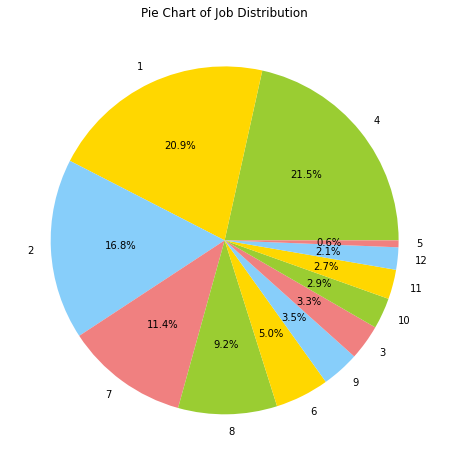

In [163]:
# Get the job counts and total number of jobs
job_counts = dict(customer_df['job'].value_counts())
total_jobs = customer_df['job'].value_counts().sum()

# Calculate the percentages
percentages = [(count / total_jobs) * 100 for count in job_counts.values()]

# Create the labels and colors
labels = list(job_counts.keys())
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Create the pie chart
ax.pie(percentages, labels=labels, colors=colors, autopct='%1.1f%%')

# Set the title
ax.set_title('Pie Chart of Job Distribution')

# Show the plot
plt.show()


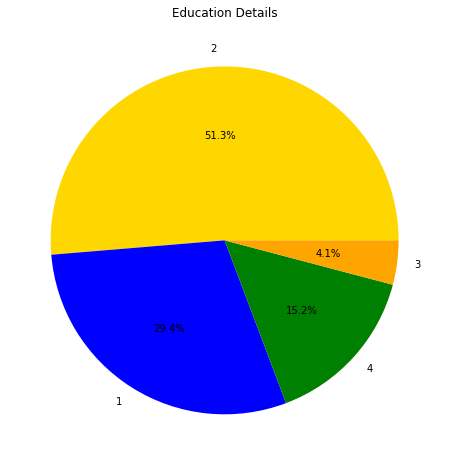

In [164]:
# Get the education counts and total number of educations
edu_counts = dict(customer_df['education_qual'].value_counts())
total_edus = customer_df['education_qual'].value_counts().sum()

# Calculate the percentages for the second chart
percentages = [(count / total_edus) * 100 for count in edu_counts.values()]

# Create the labels and colors for the second chart
labels = list(edu_counts.keys())
colors = ['gold', 'blue', 'green', 'orange', 'purple']

# Create a figure and axis for the second chart
fig, ax = plt.subplots(figsize=(8, 8))

# Create the pie chart for the second chart
ax.pie(percentages, labels=labels, colors=colors, autopct='%1.1f%%')

# Set the title for the second chart
ax.set_title("Education Details")

# Show the second chart
plt.show()


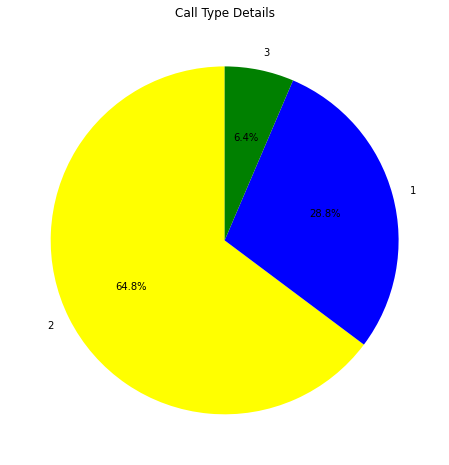

In [165]:
# Get the call type counts and total number of call type

call_type_count = dict(customer_df['call_type'].value_counts())
total_call_type = customer_df['call_type'].value_counts().sum()

# Calculate the percentages for the second chart
percent = []
for i in list(customer_df['call_type'].value_counts()):
    percent.append((int(i) / total_call_type) * 100)

# Creating the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(percent, labels=call_type_count.keys(), autopct='%1.1f%%', startangle=90, colors=['yellow', 'blue', 'green', 'maroon', 'purple'])

# Setting the title
ax.set_title("Call Type Details")

# Displaying the chart
plt.show()

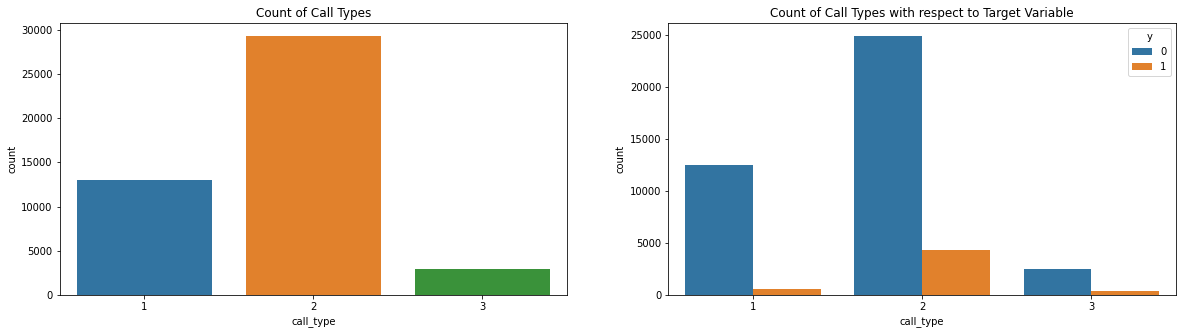

In [177]:
# analysis based on call type

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes=plt.subplots(ncols=2,figsize=(20,5))

# Plot count of call types
sns.countplot(x='call_type', ax=axes[0], data=customer_df)
axes[0].set_title("Count of Call Types")

# Plot count of call types with respect to target variable
sns.countplot(x='call_type', hue='y', ax=axes[1], data=customer_df)
axes[1].set_title("Count of Call Types with respect to Target Variable")

plt.show()


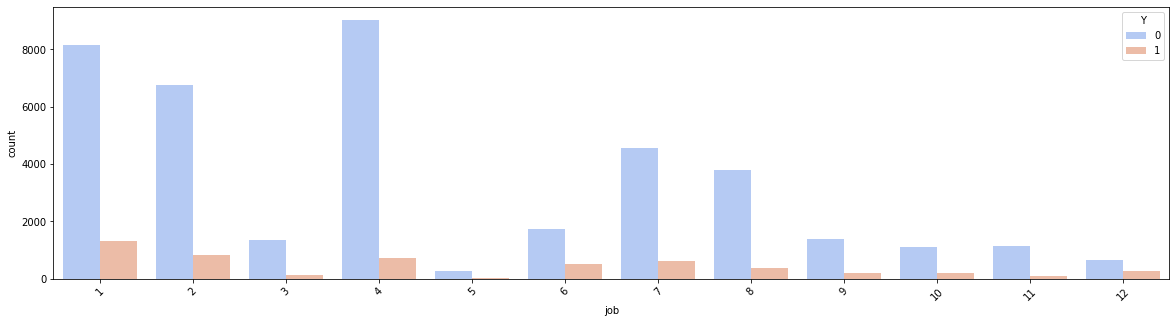

In [186]:
# analysis based on job

fig, axes = plt.subplots(figsize=(20, 5))
sns.countplot(x='job', hue='y', data=customer_df, palette='coolwarm', ax=axes)
plt.xticks(rotation=45)
plt.legend(title='Y', loc='upper right')
plt.show()


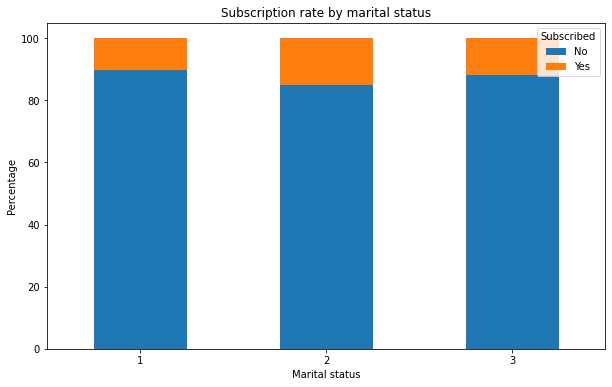

In [181]:
# analysis based on marital status

df_marital = pd.crosstab(customer_df['marital'], customer_df['y'], normalize='index') * 100
df_marital.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Subscription rate by marital status')
plt.xlabel('Marital status')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Subscribed', loc='upper right', labels=['No', 'Yes'])
plt.show()


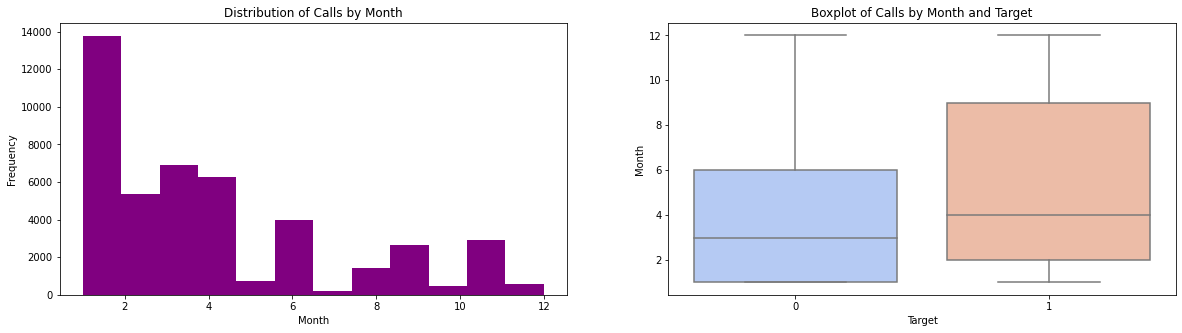

In [189]:
# analysis based on month

fig, axes = plt.subplots(ncols=2, figsize=(20, 5))
axes[0].hist(x=customer_df['mon'], bins=12, color='purple')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Calls by Month')

sns.boxplot(x='y', y='mon', data=customer_df, ax=axes[1], palette='coolwarm')
axes[1].set_xlabel('Target')
axes[1].set_ylabel('Month')
axes[1].set_title('Boxplot of Calls by Month and Target')
plt.show()


<Axes: xlabel='prev_outcome', ylabel='count'>

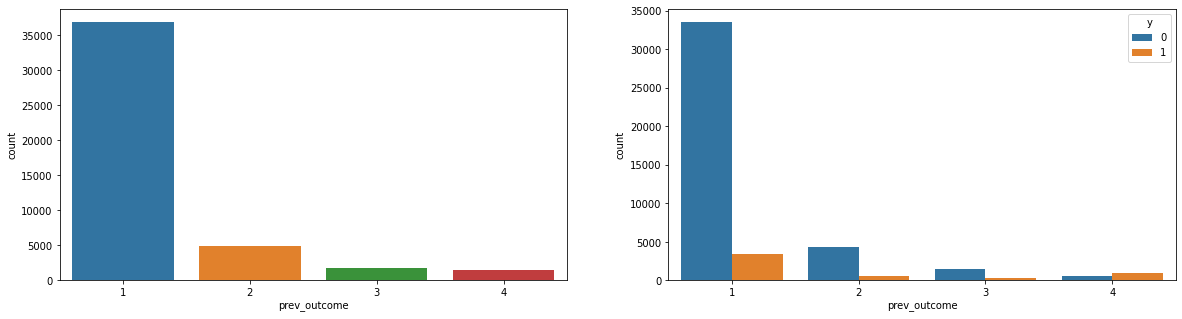

In [196]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 5))
sns.countplot(x='prev_outcome', ax=axes[0], data=customer_df)
sns.countplot(x='prev_outcome', hue='y', ax=axes[1], data=customer_df)


# **Preprocess the data**

Following steps are followed:



*   Remove rows with missing values or unknown values.

*   Convert categorical variables to numerical variables using one-hot encoding or ordinal encoding.
*   Scale numerical variables to have zero mean and unit variance.


*  Split the data into training and validation sets.






In [106]:
# Remove rows with missing values or unknown values from the dataframe

customer_df = customer_df.dropna()
customer_df = customer_df[customer_df != 'unknown']
customer_df


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,1.606965,1,1,1,1,-1.298476,1,0.011016,-0.569351,1,0
1,0.288529,2,2,2,1,-1.298476,1,-0.416127,-0.569351,1,0
2,-0.747384,3,1,2,1,-1.298476,1,-0.707361,-0.569351,1,0
3,0.571051,4,1,3,1,-1.298476,1,-0.645231,-0.569351,1,0
4,-0.747384,5,2,3,1,-1.298476,1,-0.233620,-0.569351,1,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,2,1,1,2,0.143418,6,2.791329,0.076230,1,1
45207,2.831227,6,3,4,2,0.143418,6,0.768224,-0.246560,1,1
45208,2.925401,6,1,2,2,0.143418,6,3.373797,0.721811,4,1
45209,1.512791,4,1,2,3,0.143418,6,0.970146,0.399020,1,0


## **Convert categorical variables to numerical variables using ordinal encoding**

In [108]:
encoder = OrdinalEncoder()
customer_df["job"] = encoder.fit_transform(customer_df[["job"]])
customer_df["marital"] = encoder.fit_transform(customer_df[["marital"]])
customer_df["education_qual"] = encoder.fit_transform(customer_df[["education_qual"]])
customer_df["call_type"] = encoder.fit_transform(customer_df[["call_type"]])
customer_df["prev_outcome"] = encoder.fit_transform(customer_df[["prev_outcome"]])
customer_df["mon"] = encoder.fit_transform(customer_df[["mon"]])
customer_df["y"] = (customer_df["y"] == "yes").astype(int)
customer_df["y"] = encoder.fit_transform(customer_df[["y"]])

***# Scale numerical variables***

In [109]:
scaler = StandardScaler()
scaled_cols = scaler.fit_transform(customer_df[["age", "day", "dur", "num_calls"]])
customer_df[["age", "day", "dur", "num_calls"]] = scaled_cols


***# Split the data into training and validation sets*** 

In [111]:
train_df, val_df = train_test_split(customer_df, test_size=0.2, random_state=42)
train_df, val_df


(            age  job  marital  education_qual  call_type       day  mon  \
 3344   0.006007    4        1               4          1 -0.096898    1   
 17965  0.759399    2        1               4          2  1.705471    3   
 18299  0.100181    7        1               2          2  1.825628    3   
 10221 -0.370689    1        2               1          1 -0.577529    2   
 32192  1.418617    4        1               4          2 -0.096898   11   
 ...         ...  ...      ...             ...        ...       ...  ...   
 11284  0.288529   11        2               4          1  0.263576    2   
 44732 -1.689124   12        2               1          2 -0.938003   12   
 38158 -0.653211    2        3               1          2 -0.096898    1   
 860   -0.747384    6        1               2          1 -1.058161    1   
 15795 -0.276515    4        1               4          2  0.624050    3   
 
             dur  num_calls  prev_outcome  y  
 3344  -0.722893  -0.569351            

In [112]:
# Separate the input features and target variable

X_train = train_df.drop("y", axis=1)
y_train = train_df["y"]
X_val = val_df.drop("y", axis=1)
y_val = val_df["y"]

In [113]:
X_train

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
3344,0.006007,4,1,4,1,-0.096898,1,-0.722893,-0.569351,1
17965,0.759399,2,1,4,2,1.705471,3,0.042081,-0.246560,1
18299,0.100181,7,1,2,2,1.825628,3,-0.497672,0.399020,1
10221,-0.370689,1,2,1,1,-0.577529,2,0.453692,2.658552,1
32192,1.418617,4,1,4,2,-0.096898,11,0.022665,-0.246560,1
...,...,...,...,...,...,...,...,...,...,...
11284,0.288529,11,2,4,1,0.263576,2,7.124890,-0.569351,1
44732,-1.689124,12,2,1,2,-0.938003,12,-0.187023,-0.569351,2
38158,-0.653211,2,3,1,2,-0.096898,1,-0.074413,-0.569351,1
860,-0.747384,6,1,2,1,-1.058161,1,-0.571452,-0.569351,1


In [114]:
y_train

3344     0
17965    0
18299    0
10221    0
32192    0
        ..
11284    0
44732    0
38158    0
860      0
15795    0
Name: y, Length: 36168, dtype: int64

In [116]:
X_val

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
3776,-0.088167,4,1,2,1,0.023260,1,-0.256919,-0.569351,1
9928,0.571051,8,2,2,1,-0.817845,2,-0.680179,-0.246560,1
33409,-1.500776,12,2,1,2,0.503892,11,-0.124893,-0.569351,1
31885,0.100181,1,1,1,2,-0.817845,11,0.205172,-0.569351,2
15738,1.418617,1,1,1,2,0.624050,3,-0.532621,-0.246560,1
...,...,...,...,...,...,...,...,...,...,...
13353,0.571051,1,1,1,2,-0.938003,3,-0.377296,-0.569351,1
38732,-0.841558,4,2,2,2,-0.096898,1,1.684640,0.076230,1
5654,1.041921,7,3,2,1,1.224839,1,-0.202555,-0.569351,1
3779,-0.088167,7,3,2,1,0.023260,1,-0.338465,-0.246560,1


In [117]:
y_val

3776     0
9928     0
33409    0
31885    0
15738    0
        ..
13353    0
38732    0
5654     0
3779     0
11677    0
Name: y, Length: 9043, dtype: int64

# **Note:**
Ordinal encoding has been used to convert the categorical variables to numerical variables, and standard scaling has been used to scale the numerical variables. The data has also been split into training and validation sets, and the input features and target variable have been separated.





***The preprocessed data is then split into training and validation sets. The code defines two preprocessing pipelines - one for numeric features and one for categorical features - and combines them using a ColumnTransformer.***

In [127]:
# Load the data and preprocess it
customer_df = pd.read_csv("https://github.com/sunilbabu07/customer-conversion-prediction/blob/main/train.csv?raw=true")
customer_df = customer_df.dropna()
customer_df = customer_df[customer_df != 'unknown']
encoder = OrdinalEncoder()
customer_df["job"] = encoder.fit_transform(customer_df[["job"]])
customer_df["marital"] = encoder.fit_transform(customer_df[["marital"]])
customer_df["education_qual"] = encoder.fit_transform(customer_df[["education_qual"]])
customer_df["call_type"] = encoder.fit_transform(customer_df[["call_type"]])
customer_df["prev_outcome"] = encoder.fit_transform(customer_df[["prev_outcome"]])
customer_df["mon"] = encoder.fit_transform(customer_df[["mon"]])
customer_df["y"] = (customer_df["y"] == "yes").astype(int)
customer_df["y"] = encoder.fit_transform(customer_df[["y"]])
scaler = StandardScaler()
scaled_cols = scaler.fit_transform(customer_df[["age", "day", "dur", "num_calls"]])
customer_df[["age", "day", "dur", "num_calls"]] = scaled_cols
train_df, val_df = train_test_split(customer_df, test_size=0.2, random_state=42)
X_train = train_df.drop("y", axis=1)
y_train = train_df["y"]
X_val = val_df.drop("y", axis=1)
y_val = val_df["y"]

# Define the preprocessing steps for each type of feature
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder())
])

# Combine the preprocessing steps for all features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['age', 'day', 'dur', 'num_calls']),
        ('cat', categorical_transformer, ['job', 'marital', 'education_qual', 'call_type', 'prev_outcome', 'mon'])
    ])

# Train and evaluate multiple machine learning models
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier()]

for model in models:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print(f"{model.__class__.__name__}: {auc}")

LogisticRegression: 0.8690078140704909
DecisionTreeClassifier: 0.6970549234914528
RandomForestClassifier: 0.9207075058047645
XGBClassifier: 0.92648915952175


The code then trains and evaluates four machine learning models - Logistic Regression, Decision Tree, Random Forest, and XGBoost - using a pipeline that applies the preprocessing steps defined earlier. The performance of each model is evaluated based on its ROC AUC score on the validation set. 

# ***Cross-validation on multiple machine learning models***

In [128]:
from sklearn.model_selection import cross_val_score

models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier()]

for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print(f"{model.__class__.__name__}: {scores.mean():.4f} +/- {scores.std():.4f}")

LogisticRegression: 0.8774 +/- 0.0057
DecisionTreeClassifier: 0.7009 +/- 0.0072
RandomForestClassifier: 0.9262 +/- 0.0025
XGBClassifier: 0.9291 +/- 0.0031


# ***Plotting ROC curve to ML model***

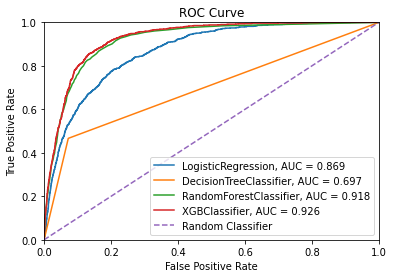

In [129]:
from sklearn.metrics import roc_curve

# Train and evaluate multiple machine learning models
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier()]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred)
    plt.plot(fpr, tpr, label=f"{model.__class__.__name__}, AUC = {auc:.3f}")

# Plot the ROC curves
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


**# Logistic regression**

In [132]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
feature_importance = abs(lr_model.coef_[0])
sorted_idx = feature_importance.argsort()[::-1]
for i in sorted_idx:
    print(f"{X_train.columns[i]}: {feature_importance[i]}")

dur: 1.022131030807261
prev_outcome: 0.7212827938144372
call_type: 0.6060649072011911
num_calls: 0.2822491650366199
education_qual: 0.2421308392254383
marital: 0.17037379861458488
age: 0.08751845711922078
mon: 0.08739120272724303
job: 0.034075960318722655
day: 0.025185897209870602


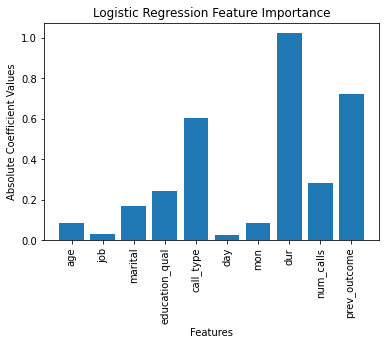

In [131]:
# Fit the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Get the absolute value of the coefficients
coef = abs(lr_model.coef_[0])

# Create a bar chart to show the feature importance
plt.bar(range(len(coef)), coef)
plt.xticks(range(len(coef)), X_train.columns, rotation=90)
plt.xlabel("Features")
plt.ylabel("Absolute Coefficient Values")
plt.title("Logistic Regression Feature Importance")
plt.show()

**# Decision tree**


In [133]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
feature_importance = dt_model.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]
for i in sorted_idx:
    print(f"{X_train.columns[i]}: {feature_importance[i]}")

dur: 0.3410527085247864
age: 0.13509564516331884
day: 0.12959899138807857
prev_outcome: 0.10918450764936623
mon: 0.09882009253638217
job: 0.06395745520344027
num_calls: 0.04608095967972588
education_qual: 0.029686726200056274
marital: 0.02404387653246309
call_type: 0.022479037122382257


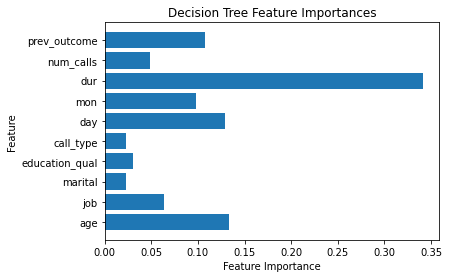

In [134]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
feature_importance = dt_model.feature_importances_

plt.barh(X_train.columns, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importances")
plt.show()

**# Random forest**

In [135]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
feature_importance = rf_model.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]
for i in sorted_idx:
    print(f"{X_train.columns[i]}: {feature_importance[i]}")


dur: 0.332172755945127
age: 0.138759327933737
day: 0.12789061645300845
mon: 0.10177921749202636
prev_outcome: 0.10074964874080866
job: 0.06441523953907421
num_calls: 0.0495043343258501
education_qual: 0.03232574920870297
marital: 0.026600553778805835
call_type: 0.02580255658285948


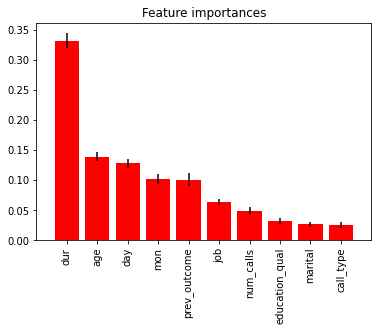

In [136]:
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()


**XGBoost classifier**

In [137]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
feature_importance = xgb_model.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]
for i in sorted_idx:
    print(f"{X_train.columns[i]}: {feature_importance[i]}")


prev_outcome: 0.2845606803894043
call_type: 0.21201714873313904
dur: 0.1435166597366333
mon: 0.1155322939157486
day: 0.05424614995718002
marital: 0.04151860252022743
age: 0.04110873118042946
education_qual: 0.04049153998494148
num_calls: 0.03568271920084953
job: 0.031325455754995346


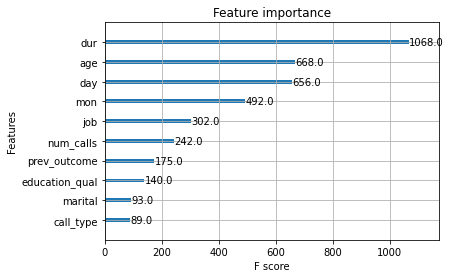

In [138]:
from xgboost import plot_importance

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

plot_importance(xgb_model)
plt.show()




1. KNN is not a model that provides feature importances like decision trees or random forests.

2. KNN is a distance-based algorithm that makes predictions based on the distances between the new input data point and the training data. It doesn't explicitly select features or assign importance to them. 



# **Correlation coefficients **

In [144]:
customer_df.corr()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
age,1.000000,0.004262,-0.126351,0.197850,0.092577,-0.009120,0.049392,-0.004648,0.004760,0.012238,0.025155
job,0.004262,1.000000,0.025000,0.259541,0.001588,-0.027535,0.011875,0.008166,-0.035410,0.014057,0.022396
marital,-0.126351,0.025000,1.000000,-0.109133,-0.014290,-0.005217,0.002324,0.018834,-0.029294,0.020126,0.043846
education_qual,0.197850,0.259541,-0.109133,1.000000,-0.068756,-0.024666,-0.083039,-0.003267,0.002234,-0.048727,-0.058675
call_type,0.092577,0.001588,-0.014290,-0.068756,1.000000,0.038643,0.438779,0.001494,0.020046,0.221644,0.130590
day,-0.009120,-0.027535,-0.005217,-0.024666,0.038643,1.000000,0.007855,-0.030206,0.162490,-0.072629,-0.028348
mon,0.049392,0.011875,0.002324,-0.083039,0.438779,0.007855,1.000000,0.023540,-0.085634,0.217733,0.166663
dur,-0.004648,0.008166,0.018834,-0.003267,0.001494,-0.030206,0.023540,1.000000,-0.084570,0.023192,0.394521
num_calls,0.004760,-0.035410,-0.029294,0.002234,0.020046,0.162490,-0.085634,-0.084570,1.000000,-0.094982,-0.073172
prev_outcome,0.012238,0.014057,0.020126,-0.048727,0.221644,-0.072629,0.217733,0.023192,-0.094982,1.000000,0.259315


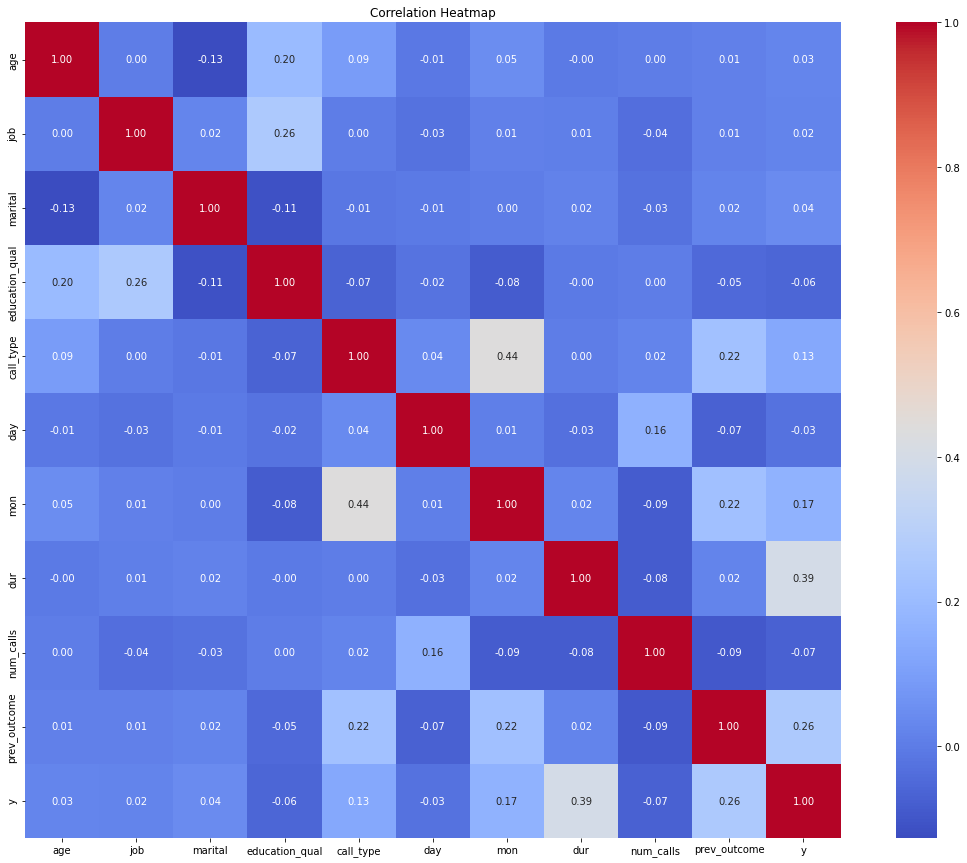

In [150]:
# Will create a heatmap with the correlation coefficients between each pair of features, annotated with the numerical values. 

import matplotlib.pyplot as plt
import seaborn as sns

# Generate a heatmap of the correlation coefficients
plt.figure(figsize=(20, 15))
sns.heatmap(customer_df.corr(), cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()
